## Shapefiles published by the City of Scottsdale

### A shapefile is made up of a collection of points.  If lines were drawn between those points, an area would become enclosed.  Shapefiles are often use to outline specific areas, such as cities or counties.

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 100
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
from shapely.geometry import LineString, shape

### Street Centerlines

In [2]:
streets = gpd.read_file('shp_files/Street_Centerlines/Street_Centerlines.shp')

# Change the CRS (Coordinate Reference System). These go by codes, which are called epsg. The lat/long CRS has a code of epsg=4326
streets = streets.to_crs(epsg=4326)

In [3]:
type(streets)

geopandas.geodataframe.GeoDataFrame

In [58]:
streets.head()

,OBJECTID,street_nam,status,road_type,traffic_fl,left_from,left_to,right_from,right_to,jurisdicti,jurisdic_1,geometry
0,21589397,E WESTLAND DR,Built,Minor Collector - Rural,Both,8100.0,8108.0,8101.0,8109.0,Scottsdale,Scottsdale,"LINESTRING (-111.9062344849714 33.79203317397966, -111.9062340864836 33.79203317394597)"
1,21588743,E INDIAN BEND RD,Built,Minor Arterial - Suburban,Both,7826.0,7828.0,7827.0,7829.0,Scottsdale,Scottsdale,"LINESTRING (-111.9111111877816 33.538498061408, -111.9111055230048 33.53849801426592)"
2,21588980,N 123RD ST,Not Built,Private,Both,23560.0,23568.0,23561.0,23569.0,Scottsdale,Scottsdale,"LINESTRING (-111.815273839966 33.69927243486868, -111.815281276163 33.69928222133088)"
3,21589196,N 82ND ST,Built,Minor Collector - Suburban,Both,6046.0,6048.0,6047.0,6049.0,Scottsdale,Scottsdale,"LINESTRING (-111.904462864327 33.52533014273052, -111.9044627740628 33.52534426861099)"
4,21589369,N 84TH ST,Built,Residential,Both,24420.0,24428.0,24421.0,24429.0,Scottsdale,Scottsdale,"LINESTRING (-111.8977732160113 33.70932961746756, -111.8977737578594 33.7093333937193, -111.8977..."


In [59]:
street_lat_lon = streets[['street_nam', 'geometry']].copy()

In [63]:
# extract the latitude and longitude from each street segment
street_lat_lon['lat'] = street_lat_lon['geometry'].apply(lambda x: shape(x).centroid.x)
street_lat_lon['lon'] = street_lat_lon['geometry'].apply(lambda x: shape(x).centroid.y)

In [64]:
street_lat_lon.head()

,street_nam,geometry,lat,lon
0,E WESTLAND DR,"LINESTRING (-111.9062344849714 33.79203317397966, -111.9062340864836 33.79203317394597)",-111.906234,33.792033
1,E INDIAN BEND RD,"LINESTRING (-111.9111111877816 33.538498061408, -111.9111055230048 33.53849801426592)",-111.911108,33.538498
2,N 123RD ST,"LINESTRING (-111.815273839966 33.69927243486868, -111.815281276163 33.69928222133088)",-111.815278,33.699277
3,N 82ND ST,"LINESTRING (-111.904462864327 33.52533014273052, -111.9044627740628 33.52534426861099)",-111.904463,33.525337
4,N 84TH ST,"LINESTRING (-111.8977732160113 33.70932961746756, -111.8977737578594 33.7093333937193, -111.8977...",-111.897774,33.709337


In [75]:
street_lat_lon['street_nam'].value_counts().head(10)

N SCOTTSDALE RD    167
N 56TH ST          165
N 68TH ST          161
N 52ND ST          161
N 78TH ST          152
N HAYDEN RD        145
N 54TH ST          138
N PIMA RD          128
N 82ND ST          127
N TATUM BL         118
Name: street_nam, dtype: int64

In [79]:
# find the average latitude and longitude of each street
street_lat_lon.groupby(['street_nam'])[['lat', 'lon']].mean().head()

,lat,lon
street_nam,,
E 1ST AV,-111.925177,33.493748
E 1ST ST,-111.915258,33.475262
E 2ND ST,-111.924092,33.485631
E 3RD AV,-111.926077,33.496625
E 3RD ST,-111.912524,33.471646


In [80]:
# save street names with latitude and longitude to csv file
street_lat_lon.groupby(['street_nam'])[['lat', 'lon']].mean().to_csv('csv_files/street_with_lat_lon.csv')

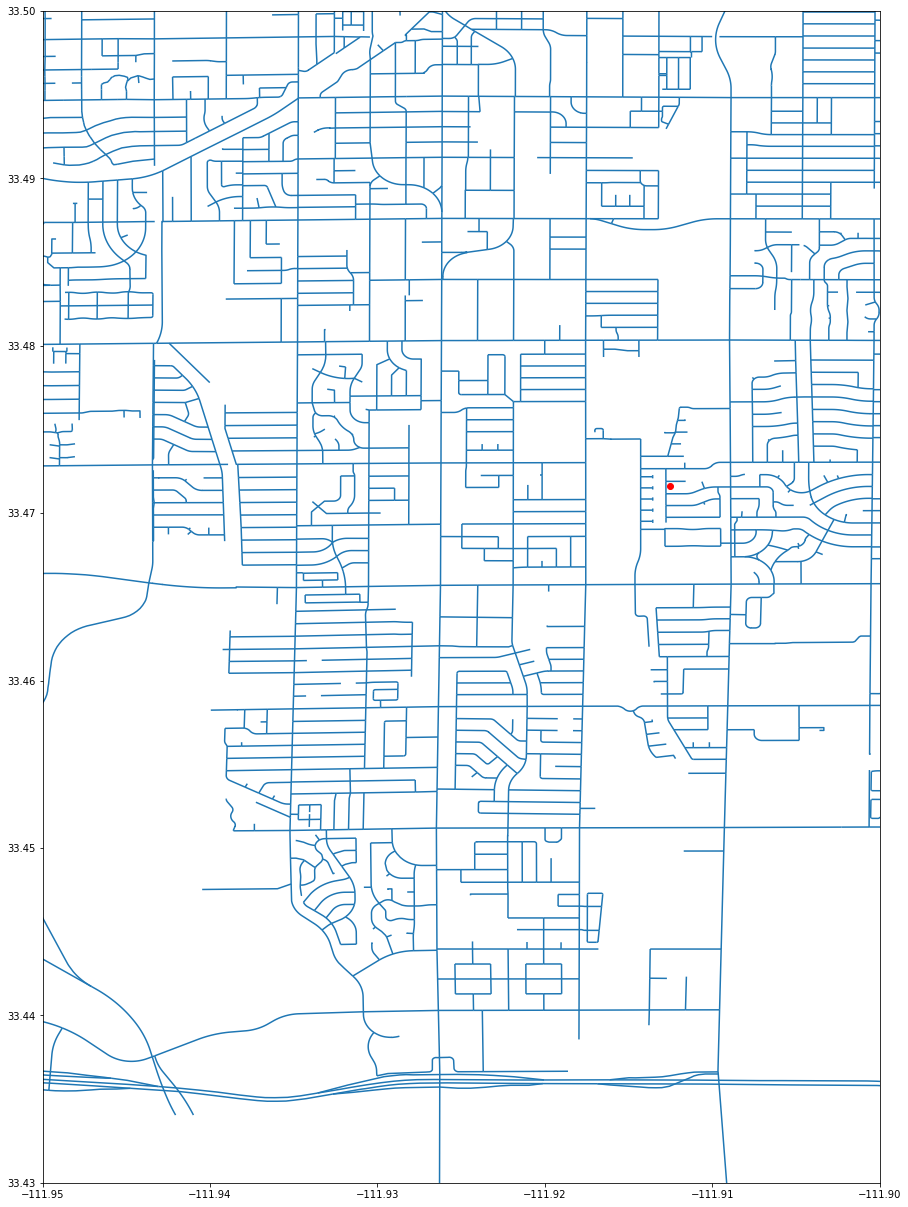

In [82]:
#visualize street shapefile

fig, ax = plt.subplots(figsize = (15, 50))
streets.plot(ax = ax)

plt.ylim(33.43, 33.5)
plt.xlim(-111.95, -111.90)

plt.plot(-111.912524, 33.471646, 'ro')
# plt.plot(-111.9258794, 33.6140428, 'ro')
# plt.plot(-111.9389946, 33.5021649, 'ro')

(-111.94, -111.88)

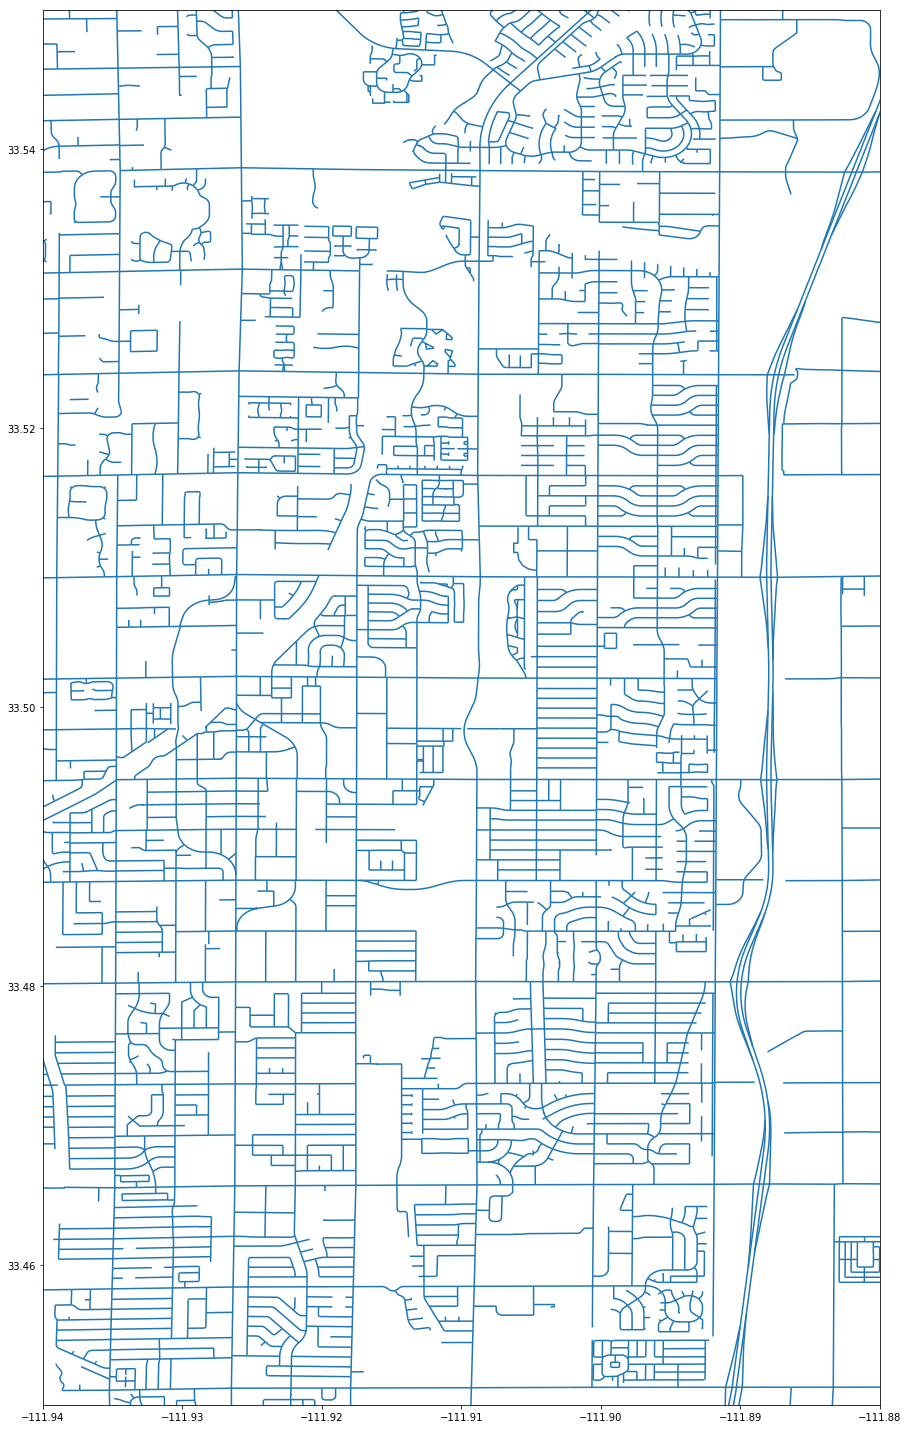

In [26]:
# examin street detail
fig, ax = plt.subplots(figsize = (15, 50))
streets.plot(ax = ax)

plt.ylim(33.45, 33.55)
plt.xlim(-111.94, -111.88)

### City Outlines 

In [16]:
city_outlines = gpd.read_file('shp_files/City_Limits/City_Limits.shp')

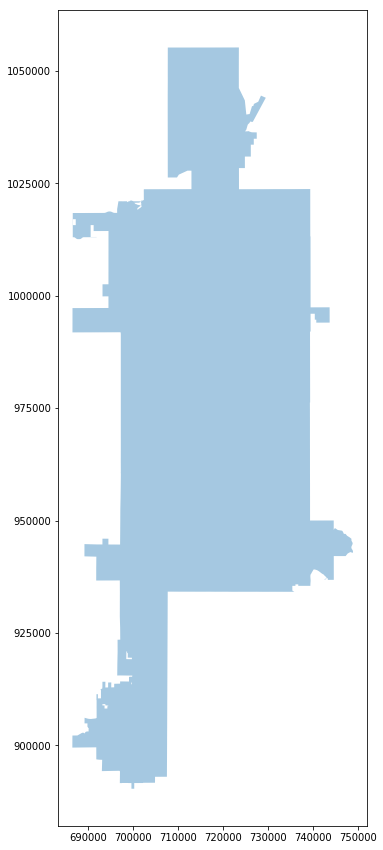

In [20]:
fig, ax = plt.subplots(figsize = (15, 15))
city_outlines.plot(ax = ax, alpha=.4)

### City Parcels

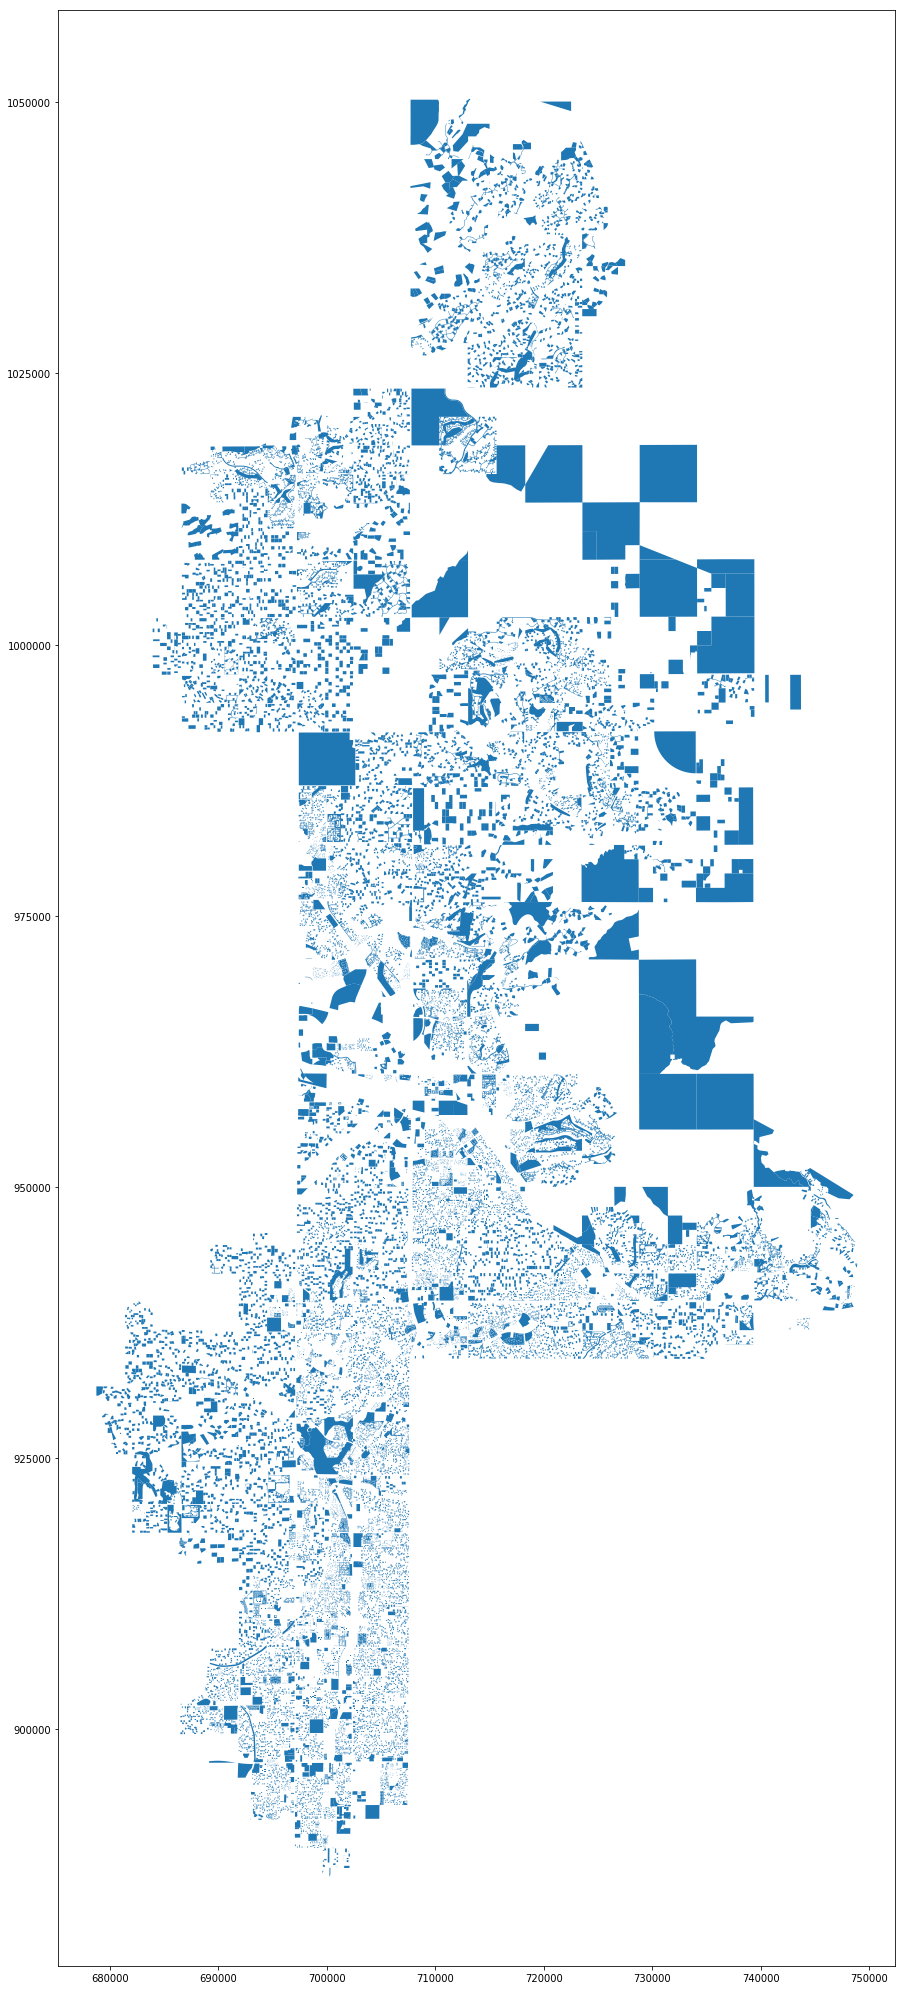

In [18]:
parcels = gpd.read_file('shp_files/Parcels/Parcels.shp')
fig, ax = plt.subplots(figsize = (15, 50))
parcels.plot(ax = ax)